In [54]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from seaborn import scatterplot, heatmap

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_absolute_error

from joblib import dump

import os
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')
  base_dir = "./drive/My Drive/Colab Notebooks/" # You may need to change this, depending on where your notebooks are on Google Drive
else:
  base_dir = "." 

In [55]:
df = pd.read_csv("../datasets/dataset_alcohol.csv")

df = df.sample(frac=1, random_state=2)
df.reset_index(drop=True, inplace=True)

In [56]:
df.shape

(76, 9)

In [57]:
df.columns

Index(['age_yrs', 'height_cm', 'weight_kg', 'duration_mins', 'elapsed_mins',
       'sex', 'last_meal', 'units', 'over_limit'],
      dtype='object')

In [58]:
# Explority Datagram Analysis

# Model Selection

In [59]:
df.describe(include="all")

,age_yrs,height_cm,weight_kg,duration_mins,elapsed_mins,sex,last_meal,units,over_limit
count,76.000000,76.000000,76.000000,76,76,76,65,76.000000,76
unique,NaN,NaN,NaN,16,9,2,4,NaN,2
top,NaN,NaN,NaN,120,10,Male,Full,NaN,No
freq,NaN,NaN,NaN,15,61,60,33,NaN,46
mean,22.657895,176.644737,71.486842,NaN,NaN,NaN,NaN,8.632895,NaN
std,5.627439,8.453329,11.474602,NaN,NaN,NaN,NaN,5.775567,NaN
min,18.000000,157.000000,47.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,19.000000,172.000000,63.000000,NaN,NaN,NaN,NaN,4.275000,NaN
50%,21.000000,177.000000,72.000000,NaN,NaN,NaN,NaN,8.400000,NaN
75%,23.000000,182.000000,79.000000,NaN,NaN,NaN,NaN,12.100000,NaN


In [60]:
# The datatypes
df.dtypes

age_yrs            int64
height_cm          int64
weight_kg          int64
duration_mins     object
elapsed_mins      object
sex               object
last_meal         object
units            float64
over_limit        object
dtype: object

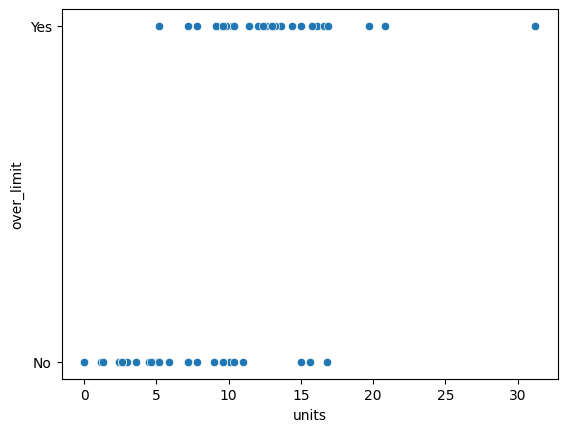

In [61]:
plot = scatterplot(x="units", y="over_limit", data=df)

In [62]:
features = ['age_yrs', 'height_cm', 'weight_kg', 'duration_mins', 'elapsed_mins',
       'sex', 'last_meal', 'units', 'over_limit']
nominal_features = ['sex', 'last_meal']
numeric_f = ['age_yrs', 'height_cm', 'weight_kg', 'duration_mins', 'elapsed_mins',
       'sex', 'last_meal', 'units']

In [63]:
for feature in nominal_features:
    print(feature, df[feature].unique())

sex ['Male' 'Female']
last_meal ['Snack' 'Lunch' 'Full' nan '?']


In [64]:
for feature in numeric_f:
    print(feature, df[feature].unique())

age_yrs [21 34 23 26 19 24 18 20 36 22 25 40 38 39 29 45 28]
height_cm [185 187 200 177 175 162 182 180 170 172 165 157 160 167]
weight_kg [ 85  95 101  76  69  57  82  63  79  66  73  88  84  71  75  72  47  60
  55  51  48  52  53  64  80]
duration_mins ['315' '240' '60' '30' '180' '90' '120' '325' '330' '?' '270' '150' '360'
 '300' '5' '435']
elapsed_mins ['10' '5' '15' '180' '120' '40' '?' '30' '60']
sex ['Male' 'Female']
last_meal ['Snack' 'Lunch' 'Full' nan '?']
units [19.7 10.2  4.8  2.9  2.6 15.6  3.   5.  13.6 20.8 10.4  2.4  5.2 16.8
 16.1  7.2 10.   0.  12.6 13.2  9.   5.1  7.8  1.3 16.9  4.5  3.6 11.4
 12.   9.6  9.1 10.1 14.4  9.8  9.5  4.6 13.  16.6  1.2 15.8 12.4 31.2
 11.  15.   5.9]


In [65]:
df = (df[df["last_meal"] != "?"]).copy()
df.reset_index(drop=True, inplace=True)


for feature in nominal_features:
    print(feature, df[feature].unique())

sex ['Male' 'Female']
last_meal ['Snack' 'Lunch' 'Full' nan]


In [66]:
# Check the invalid data was filtered out
df.shape

(75, 9)

In [70]:
df = (df[df["duration_mins"] != "?"]).copy()
df.reset_index(drop=True, inplace=True)

In [72]:
df = (df[df["elapsed_mins"] != "?"]).copy()
df.reset_index(drop=True, inplace=True)

In [73]:
df.shape

(73, 9)

In [74]:
for feature in numeric_f:
    print(feature, df[feature].unique())

age_yrs [21 34 23 26 19 24 18 20 36 22 25 38 39 29 45 28]
height_cm [185 187 200 177 175 162 182 180 172 170 165 157 160 167]
weight_kg [ 85  95 101  76  69  57  82  63  79  66  73  88  84  71  72  47  60  55
  51  48  52  53  75  64  80]
duration_mins ['315' '240' '60' '30' '180' '90' '120' '325' '330' '270' '150' '360'
 '300' '5' '435']
elapsed_mins ['10' '5' '15' '180' '120' '40' '60' '30']
sex ['Male' 'Female']
last_meal ['Snack' 'Lunch' 'Full' nan]
units [19.7 10.2  4.8  2.9  2.6 15.6  3.   5.  13.6 20.8 10.4  2.4  5.2 16.8
 16.1  7.2 10.  12.6 13.2  9.   5.1  7.8  1.3 16.9  3.6 11.4 12.   9.6
  9.1 10.1 14.4  9.8  9.5  4.6 13.  16.6  1.2 15.8 12.4 31.2 11.  15.
  5.9]


In [75]:
df.info

<bound method DataFrame.info of     age_yrs  height_cm  weight_kg duration_mins elapsed_mins     sex  \
0        21        185         85           315           10    Male   
1        34        187         95           240            5    Male   
2        23        200        101            60           10    Male   
3        26        177         76            60           10    Male   
4        19        175         69            30           10    Male   
..      ...        ...        ...           ...          ...     ...   
68       20        170         63           270           10  Female   
69       28        185         88           120           10    Male   
70       22        177         82           300           10    Male   
71       21        177         88            90           10    Male   
72       19        165         60            60           10  Female   

   last_meal  units over_limit  
0      Snack   19.7        Yes  
1      Lunch   10.2         No  
2   

In [77]:
df

,age_yrs,height_cm,weight_kg,duration_mins,elapsed_mins,sex,last_meal,units,over_limit
0,21,185,85,315,10,Male,Snack,19.7,Yes
1,34,187,95,240,5,Male,Lunch,10.2,No
2,23,200,101,60,10,Male,Snack,4.8,No
3,26,177,76,60,10,Male,Full,2.9,No
4,19,175,69,30,10,Male,Full,2.6,No
...,...,...,...,...,...,...,...,...,...
68,20,170,63,270,10,Female,Lunch,5.9,No
69,28,185,88,120,10,Male,Full,5.2,No
70,22,177,82,300,10,Male,Snack,15.0,Yes
71,21,177,88,90,10,Male,Full,5.2,No
